# LUTRA Dataset Analysis



This notebook want to analyse the LUTRA dataset.

The final dataset folder will contains the following properties:
- Dataset information based on padas statistical analysis
- Dataset information grouping by classes

In [1]:
import os
import pandas as pd
import base64
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

In [2]:
ORIGINAL_LOGS_PATH = 'original_logs/'
OUTPUT_DATASETS_PATH = 'new_datasets/'
OUTPUT_PLOTS_PATH = 'plots/'

In [3]:
LUTRA_DATASET_FILE = 'new_datasets/lutra_dataset_clean.csv'

## Import Original Logs from folder

In [4]:
%time lutra_ds = pd.read_csv(LUTRA_DATASET_FILE)

CPU times: user 774 ms, sys: 86 ms, total: 860 ms
Wall time: 988 ms


In [7]:
lutra_ds.columns

Index(['accelerometer', 'game_rotation_vector', 'geomagnetic_rotation_vector',
       'gps_accuracy', 'gps_altitude', 'gps_bearing', 'gps_latitude',
       'gps_longitude', 'gps_speed', 'gravity', 'gyroscope', 'label', 'light',
       'linear_acceleration', 'magnetic_field', 'motor_vel_0', 'motor_vel_1',
       'net_rec_address', 'net_rec_length', 'net_rec_offset',
       'net_rec_payload_encb64', 'net_rec_payload_plainb64', 'net_rec_port',
       'net_send_address', 'net_send_length', 'net_send_payload_encb64',
       'net_send_payload_plainb64', 'orientation', 'pressure',
       'rotation_vector', 'sensor', 'step_counter', 'water_oxygen'],
      dtype='object')

In [8]:
lutra_ds.dtypes

accelerometer                  float64
game_rotation_vector           float64
geomagnetic_rotation_vector    float64
gps_accuracy                   float64
gps_altitude                   float64
gps_bearing                    float64
gps_latitude                   float64
gps_longitude                  float64
gps_speed                      float64
gravity                        float64
gyroscope                      float64
label                           object
light                          float64
linear_acceleration            float64
magnetic_field                 float64
motor_vel_0                    float64
motor_vel_1                    float64
net_rec_address                 object
net_rec_length                   int64
net_rec_offset                   int64
net_rec_payload_encb64          object
net_rec_payload_plainb64        object
net_rec_port                     int64
net_send_address                object
net_send_length                  int64
net_send_payload_encb64  

In [9]:
lutra_ds.head()

accelerometer  game_rotation_vector  geomagnetic_rotation_vector  \
0       9.649406              0.698680                     0.702353   
1       9.509575              0.721305                     0.682389   
2       9.571373              0.697298                     0.708157   
3       9.385853              0.713691                     0.674952   
4       9.550493              0.691682                     0.678288   

   gps_accuracy  gps_altitude  gps_bearing  gps_latitude  gps_longitude  \
0          15.0         113.0          0.0     45.427695      10.958553   
1          13.0         113.0          0.0     45.391197      10.968072   
2          13.0         113.0          0.0     45.400091      10.978744   
3          13.0         113.0          0.0     45.396796      11.015302   
4          13.0         113.0          0.0     45.393987      10.993227   

   gps_speed   gravity  ...  net_send_address net_send_length  \
0        0.0  9.386605  ...                 -              -1   
1        0.0  9.407188  ...           ::/:::0              13   
2        0.0  9.373592  ...           ::/:::0              21   
3        0.0  9.396139  ...           ::/:::0              13   
4        0.0  9.376641  ...           ::/:::0              13   

                             net_send_payload_encb64  \
0                                                  -   
1       VO/dp5V3WUtOQsHA+qjqqgauztzHRPQg7F/PKgODztw=   
2  L3aJdQcRD6vVk9a5ZaSwnuTErK+HMiyq0Vp01TuuToTE7q...   
3       7eghym5bXGMQZ8aRozxp8153Hp/PZ4kyNP3SiBvOtgA=   
4       OCsLgv4AjK4VWNxSXx8D36U02uEzgPteQsssqTvf4cE=   

      net_send_payload_plainb64  orientation    pressure  rotation_vector  \
0                             -     3.933827  1004.08887         0.662920   
1          //////////8AAl9XAA==     3.978634  1004.45470         0.659371   
2  //////////8AAkhJAAdWZWhpY2xl     3.877880  1004.79510         0.672899   
3          //////////8AAl9XAA==     3.846931  1004.85520         0.688697   
4          //////////8AAl9XAA==     3.694679  1004.96738         0.666977   

      sensor  step_counter  water_oxygen  
0  36.405781           7.0      0.314746  
1  36.280000           7.0      0.328495  
2  36.120000           7.0      0.316361  
3  36.120000           8.0      0.322743  
4  36.090000           8.0      0.312797  

[5 rows x 33 columns]

## Analyze dataframe properties and clean it

In [11]:
lutra_ds.describe()

accelerometer  game_rotation_vector  geomagnetic_rotation_vector  \
count   17782.000000          17782.000000                 17782.000000   
mean       23.892532              1.225230                     0.556141   
std       672.972907             21.327638                     5.322282   
min    -28441.900000             -0.975517                    -0.684520   
25%         6.385836              0.392702                     0.182488   
50%         9.432644              0.809924                     0.499623   
75%        10.399420              0.983136                     0.720873   
max     16928.000000           1006.000000                   513.000000   

       gps_accuracy  gps_altitude   gps_bearing  gps_latitude  gps_longitude  \
count  17782.000000  17782.000000  17782.000000  17782.000000   17782.000000   
mean       3.818243     93.347318     87.488297     42.509450      12.743723   
std        3.079570     43.435572    104.625341    482.210575     201.207012   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%        3.000000    107.000000      0.000000     45.382504      10.956835   
50%        3.000000    111.000000     22.300000     45.410885      10.986798   
75%        3.000000    118.000000    198.900000     45.412199      10.987913   
max       17.000000    128.000000    359.700000  45521.000000   10976.000000   

          gps_speed       gravity  ...  net_rec_length  net_rec_offset  \
count  17782.000000  17782.000000  ...    17782.000000    17782.000000   
mean       2.384153     23.865127  ...       28.297267       -0.001012   
std       47.412988    483.337076  ...       10.237994        0.031801   
min        0.000000 -10009.000000  ...       -1.000000       -1.000000   
25%        0.000000      7.751555  ...       32.000000        0.000000   
50%        1.178762      9.200437  ...       32.000000        0.000000   
75%        1.470905      9.738368  ...       32.000000        0.000000   
max     2195.000000   9782.000000  ...       32.000000        0.000000   

       net_rec_port  net_send_length   orientation      pressure  \
count  17782.000000     17782.000000  17782.000000  1.778200e+04   
mean   38360.288213        32.502362     69.083587  1.130174e+05   
std    20717.963090        23.986423   6860.042185  3.160006e+05   
min       -1.000000        -1.000000 -84375.000000  1.005000e+01   
25%     8056.500000        13.000000     -7.399360  1.003908e+03   
50%    51310.000000        21.000000     -0.390810  1.005067e+03   
75%    51310.000000        70.000000      1.749118  1.005218e+03   
max    51310.000000        70.000000  88223.000000  1.005348e+06   

       rotation_vector        sensor  step_counter  water_oxygen  
count     17782.000000  17782.000000  17782.000000  17782.000000  
mean          0.670473     59.185919    677.955742      0.416632  
std           9.701879    996.570908    617.669079      0.215632  
min          -0.706470      1.000000      0.000000      0.280219  
25%           0.182297     27.630000    129.000000      0.315695  
50%           0.499626     31.250000    582.000000      0.318923  
75%           0.722562     37.550000   1023.000000      0.333464  
max         781.000000  38141.000000   2319.000000      0.991020  

[8 rows x 26 columns]

## Statistical info by grouping by labels (classes)

In [12]:
lutra_ds.groupby('label')['accelerometer'].describe()

count       mean          std           min       25%  \
label                                                                   
dos_0          2243.0  23.222419   387.803247     -2.727049  6.834446   
dos_32         3137.0   9.200680     3.351259     -4.165108  6.863779   
fault_gpsdown  3137.0  26.432294   448.414041     -4.333420  6.860366   
fault_stucked  3103.0   9.838125     0.039116      8.784932  9.824370   
good           3137.0   9.200093     3.350992     -4.363726  6.864126   
stolen         3025.0  66.644657  1529.855570 -28441.900000 -2.164740   

                    50%        75%           max  
label                                             
dos_0          9.054724  11.356627  12543.000000  
dos_32         9.086406  11.389314     21.950840  
fault_gpsdown  9.090834  11.375340  15858.000000  
fault_stucked  9.833951   9.848321     10.547667  
good           9.081915  11.381133     21.900059  
stolen         2.378436   7.374326  16928.000000

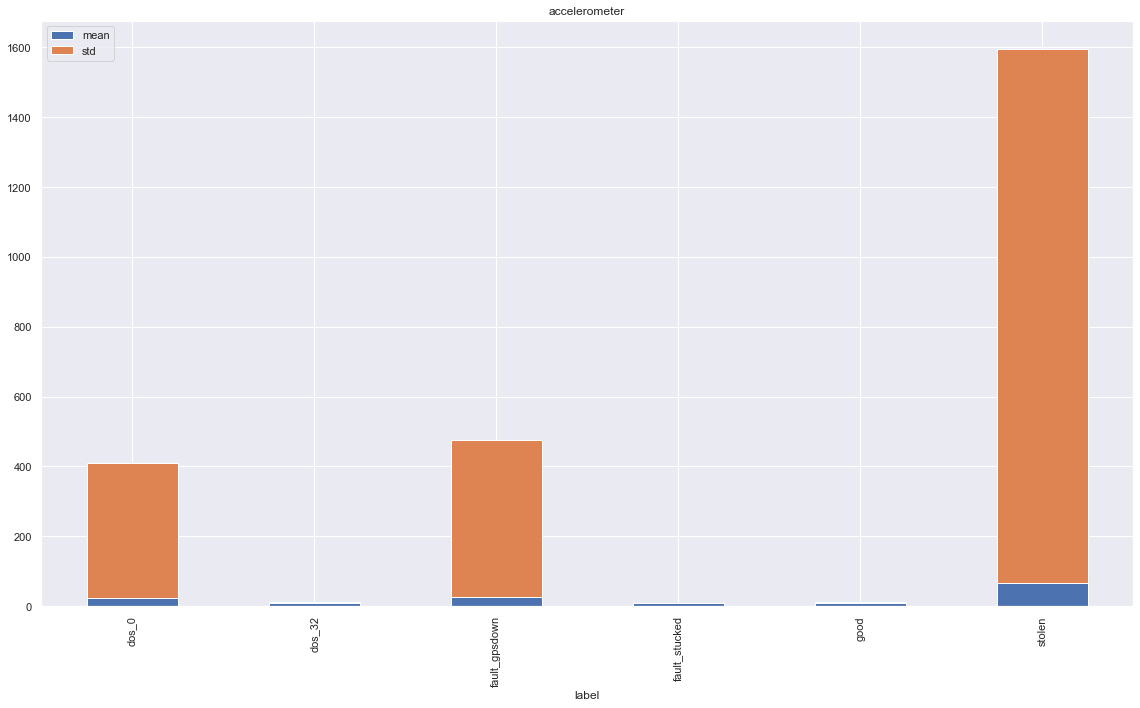

In [14]:
lutra_ds.groupby('label')['accelerometer'].describe().loc[:, ['mean', 'std']].plot.bar(title='accelerometer', figsize=(16,10), stacked=True, subplots=False)
plt.tight_layout()

### Save stacked plot for all variables

In [16]:
# Group data by label value (i.e. the class category)
label_grouped_lutra_ds = lutra_ds.groupby('label')

In [17]:
# Loop over numerical columns of the cleaned dataset and print mean and std values grouped by class label
for col in lutra_ds.select_dtypes(exclude='object').columns:
    print(col)
    label_grouped_lutra_ds[col].describe().loc[:, ['mean', 'std']].plot.bar(title=col, figsize=(16,10), stacked=True, subplots=False)
    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_PLOTS_PATH, f'{col}.png'))
    plt.close()

accelerometer
game_rotation_vector
geomagnetic_rotation_vector
gps_accuracy
gps_altitude
gps_bearing
gps_latitude
gps_longitude
gps_speed
gravity
gyroscope
light
linear_acceleration
magnetic_field
motor_vel_0
motor_vel_1
net_rec_length
net_rec_offset
net_rec_port
net_send_length
orientation
pressure
rotation_vector
sensor
step_counter
water_oxygen


## Create and save the correlation plot for mean and std

In [18]:
# Create the mean and dataframes grouped by labels
label_grouped_lutra_ds_mean = label_grouped_lutra_ds.mean()
label_grouped_lutra_ds_std = label_grouped_lutra_ds.std()

In [20]:
# Standardize dataframes
standardize_ds = lambda ds : (ds - ds.mean()) / ds.std()

# Create the standardized datasets
label_grouped_lutra_ds_mean_stand = standardize_ds(label_grouped_lutra_ds_mean)
label_grouped_lutra_ds_std_stand = standardize_ds(label_grouped_lutra_ds_std)

In [21]:
label_grouped_lutra_ds_mean_stand

accelerometer  game_rotation_vector  \
label                                                
dos_0              -0.039072             -0.450039   
dos_32             -0.670751             -0.472581   
fault_gpsdown       0.105533             -0.472354   
fault_stucked      -0.642034             -0.158455   
good               -0.670778             -0.472151   
stolen              1.917101              2.025581   

               geomagnetic_rotation_vector  gps_accuracy  gps_altitude  \
label                                                                    
dos_0                             0.186269     -0.205745      0.539690   
dos_32                           -0.653010     -0.141501      0.488525   
fault_gpsdown                     1.829686     -1.441385     -2.031458   
fault_stucked                    -0.861362      1.664111      0.262511   
good                             -0.652907     -0.141501      0.369781   
stolen                            0.151324      0.266021      0.370951   

               gps_bearing  gps_latitude  gps_longitude  gps_speed   gravity  \
label                                                                          
dos_0             0.453181      0.105916      -0.167103   0.134770  0.742030   
dos_32            0.711164      0.105931      -0.167067  -0.319917 -0.880585   
fault_gpsdown    -1.284792     -1.771568      -1.193107  -0.715843  0.411327   
fault_stucked    -1.284792      0.105943      -0.167061  -0.715843 -0.824030   
good              0.711163      0.105944      -0.167070  -0.320199 -0.880616   
stolen            0.694076      1.347835       1.861408   1.937034  1.431874   

               ...  net_rec_length  net_rec_offset  net_rec_port  \
label          ...                                                 
dos_0          ...       -2.041240       -1.629045     -1.319637   
dos_32         ...        0.406138       -0.739375     -1.261922   
fault_gpsdown  ...        0.408791        0.599906      0.645403   
fault_stucked  ...        0.407878        0.138804      0.644638   
good           ...        0.408791        0.599906      0.645403   
stolen         ...        0.409643        1.029804      0.646115   

               net_send_length  orientation  pressure  rotation_vector  \
label                                                                    
dos_0                 1.393375    -0.334789 -0.128826        -0.360594   
dos_32               -0.980577    -0.475225 -0.605529        -0.561674   
fault_gpsdown        -0.592535    -0.463150 -0.004531         0.134820   
fault_stucked         1.126601    -0.284279 -0.621301        -0.612555   
good                 -0.592535    -0.477053 -0.605529        -0.561167   
stolen               -0.354329     2.034496  1.965715         1.961170   

                 sensor  step_counter  water_oxygen  
label                                                
dos_0         -0.452922     -0.394632     -0.407462  
dos_32        -0.468066     -0.110830     -0.407131  
fault_gpsdown -0.324192     -0.110830     -0.407533  
fault_stucked -0.323200     -1.143598     -0.411989  
good          -0.468070     -0.110830     -0.407124  
stolen         2.036450      1.870721      2.041238  

[6 rows x 26 columns]

In [22]:
TITLE = 'Standardized Mean Correlation'
# Plot the related heatmap using seaborn
plt.figure(figsize=(16,6))
plt.title(TITLE)
sns.heatmap(label_grouped_lutra_ds_mean_stand, annot=False, linewidths=.5)

In [23]:
# Save the plot
TITLE = 'Standardized Mean Correlation'
plt.figure(figsize=(16,6))
plt.title(TITLE)
sns.heatmap(label_grouped_lutra_ds_mean_stand, annot=False, linewidths=.5)
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_PLOTS_PATH, f"{ TITLE.lower().replace(' ', '_') }.png"))
plt.close()

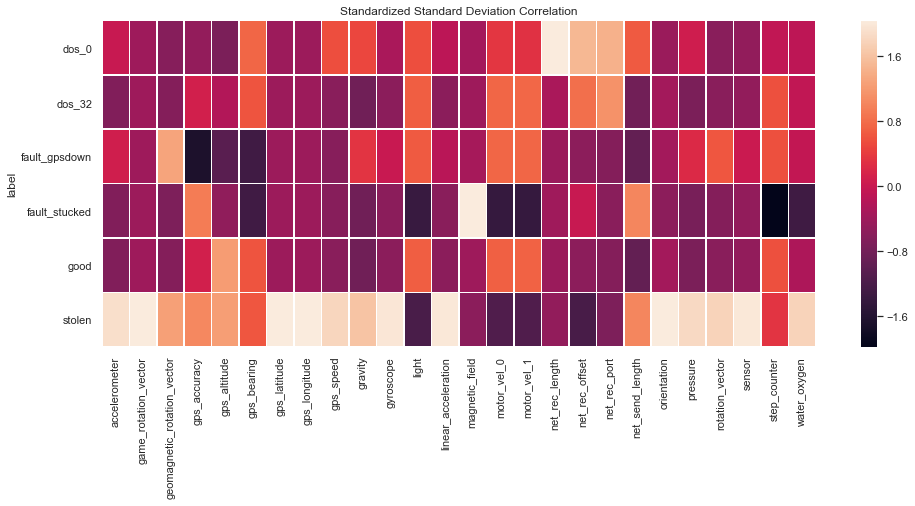

In [24]:
TITLE = 'Standardized Standard Deviation Correlation'
plt.figure(figsize=(16,6))
plt.title(TITLE)
sns.heatmap(label_grouped_lutra_ds_std_stand, annot=False, linewidths=.5)

In [25]:
TITLE = 'Standardized Standard Deviation Correlation'
plt.figure(figsize=(16,6))
plt.title(TITLE)
sns.heatmap(label_grouped_lutra_ds_std_stand, annot=False, linewidths=.5)
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_PLOTS_PATH, f"{ TITLE.lower().replace(' ', '_') }.png"))
plt.close()